# Decision Tree classification

it is a supervised learning algorithm.
it is a non paramatric supervised learning method used for classification and regression
- if then elese decision rule 
- easy use and interpret
- little data prep needed
- handle numeric and catagorical
- multi output problems can be handled
- use boolean logic to model the prediction
- perform well

In [2]:
import pandas as pd
df=pd.read_csv("multivarBiryani.csv")
df.head()


,age,height,weight,gender,likeness
0,27,170.688,76.0,Male,Biryani
1,41,165.000,70.0,Male,Biryani
2,29,171.000,80.0,Male,Biryani
3,27,173.000,102.0,Male,Biryani
4,29,164.000,67.0,Male,Biryani


In [3]:
df['gender']= df['gender'].replace('Male',1)
df['gender']= df['gender'].replace('Female',0)
df.tail()

,age,height,weight,gender,likeness
240,31,160.0,60.0,1,Pakora
241,26,172.0,70.0,1,Biryani
242,40,178.0,80.0,1,Biryani
243,25,5.7,65.0,1,Biryani
244,33,157.0,56.0,0,Samosa


In [4]:
df.columns

Index(['age', 'height', 'weight', 'gender', 'likeness'], dtype='object')

In [5]:
df1= df.drop(['age', 'height'],axis=1)
df1.head()

,weight,gender,likeness
0,76.0,1,Biryani
1,70.0,1,Biryani
2,80.0,1,Biryani
3,102.0,1,Biryani
4,67.0,1,Biryani


In [6]:
##assigning x and y from the dataset
X = df1.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df1.iloc[:, 2].values #get array of dataset in column 1st

In [7]:
X

array([[ 76.  ,   1.  ],
       [ 70.  ,   1.  ],
       [ 80.  ,   1.  ],
       [102.  ,   1.  ],
       [ 67.  ,   1.  ],
       [ 46.  ,   0.  ],
       [ 64.3 ,   0.  ],
       [ 98.  ,   1.  ],
       [ 87.5 ,   1.  ],
       [ 80.  ,   1.  ],
       [ 65.  ,   1.  ],
       [ 78.  ,   1.  ],
       [ 62.  ,   1.  ],
       [ 74.  ,   1.  ],
       [102.  ,   1.  ],
       [ 78.  ,   1.  ],
       [ 93.  ,   1.  ],
       [ 68.  ,   1.  ],
       [ 71.5 ,   1.  ],
       [135.  ,   1.  ],
       [ 82.  ,   1.  ],
       [ 70.  ,   0.  ],
       [ 60.  ,   1.  ],
       [ 84.5 ,   1.  ],
       [ 65.  ,   0.  ],
       [ 70.  ,   1.  ],
       [ 59.  ,   1.  ],
       [ 78.  ,   1.  ],
       [ 68.  ,   1.  ],
       [ 62.  ,   0.  ],
       [ 58.  ,   0.  ],
       [102.3 ,   1.  ],
       [ 64.  ,   1.  ],
       [ 50.  ,   1.  ],
       [ 75.  ,   1.  ],
       [ 77.  ,   1.  ],
       [ 82.72,   1.  ],
       [ 93.  ,   1.  ],
       [ 55.  ,   1.  ],
       [ 50.  ,   1.  ],


In [8]:
y

array(['Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Pakora', 'Samosa',
       'Samosa', 'Biryani', 'Biryani', 'Samosa', 'Biryani', 'Samosa',
       'Biryani', 'Biryani', 'Samosa', 'Biryani', 'Pakora', 'Biryani',
       'Biryani', 'Biryani', 'Pakora', 'Biryani', 'Biryani', 'Biryani',
       'Samosa', 'Biryani', 'Samosa', 'Samosa', 'Samosa', 'Biryani',
       'Samosa', 'Biryani', 'Samosa', 'Biryani', 'Biryani', 'Pakora',
       'Biryani', 'Biryani', 'Pakora', 'Biryani', 'Samosa', 'Samosa',
       'Pakora', 'Biryani', 'Samosa', 'Biryani', 'Biryani', 'Biryani',
       'Samosa', 'Samosa', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Samosa',
       'Biryani', 'Biryani', 'Biryani', 'Pakora', 'Pakora', 'Biryani',
       'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Samosa', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
    

In [9]:
#machine learning algorithm
from sklearn.tree import DecisionTreeClassifier

#creat and fit our model
model= DecisionTreeClassifier().fit(X,y)

#predictions
model.predict([["67.0","1"]])


array(['Biryani'], dtype=object)

In [10]:
# accuracy of model
#split data into test and train (80/20)%rule
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=1)

#creat a model
model.fit(X_train, y_train)

predicted_values =model.predict(X_test)
predicted_values

score = accuracy_score(y_test, predicted_values)
score

0.5102040816326531

In [11]:
#how to train and save your model
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import joblib
model = DecisionTreeClassifier().fit(X,y)

joblib.dump(model, "foodie.joblib")

['foodie.joblib']

In [12]:
# how to import/run a stored/saved model on our data 
# some time later...
 
# load the model from disk
loaded_model = joblib.load("foodie.joblib")
result = loaded_model.score(X_test, y_test)
print(result)

0.6938775510204082


In [13]:
#graph
from sklearn import tree

model= DecisionTreeClassifier().fit(X,y)
#graphic evaluation
tree.export_graphviz(model,
                    out_file="foodie.dot",
                    feature_names=["age","gender"],
                    class_names=sorted(y),
                    label= "all",
                    rounded=True,
                    filled=True)

___
___


another practice

In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
X= df.iloc[ : ,:-1]
y= df.iloc[ : ,-1:]


In [17]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


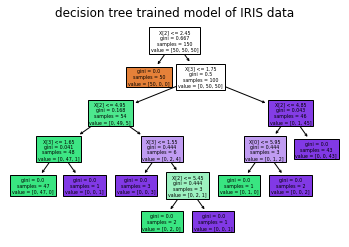

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier().fit(X,y)
plot_tree(model, filled=True)
plt.title("decision tree trained model of IRIS data")
plt.show()
